In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
import pandas as pd
import random

In [2]:
#data_path = '../data/v1.5.2/graph_avg_1_5'
#data_path = '../data/v1.5.2/graph_cov'
data_path = '../data/v1.5.2/graph_unnormal'
#data_path = '../data/v1.5.2/graph_lapl_nolow'
sets = ['dev','train']

In [3]:
def over_connected(graph, upper, is_cov) :

    G = graph.flatten()
    cross_thr, full_thr = 90, 90
    # No such over-connected graphs in covariance matrices
    if is_cov : 
        return False
    # If on full symmetric matrix, the threshold count of pixels has to be doubled
    if not upper :
        cross_thr = 2*cross_thr
        full_thr = 2*full_thr
    if (G > 0.6).sum() >= cross_thr :
        return True
    elif (G > 0.4).sum() >= full_thr : 
        return True
    else : 
        return False

In [4]:
def plot_graphs(_set, szr_type, rows, cols, _seed) :
    random.seed(_seed)
    graph_path = os.path.join(data_path,_set,szr_type)
    filenames = [f for f in listdir(graph_path) if isfile(join(graph_path, f))]

    count = []

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
    for i in range(rows*cols) :
        F = random.choice(filenames)
        graph = np.load(os.path.join(graph_path,F))
        graph = graph/np.amax(graph.flatten())

        # Retrieve Laplacian matrix
        #graph = np.diag(np.sum(graph,axis=1))-graph

        graph = np.triu(graph, 0)

        if over_connected(graph, upper=True, is_cov=False) : 
            count.append(i)
            print(F)

        #if i == 73 : print(np.around(graph[:10,:10],decimals=3))
        ax.flatten()[i].imshow(graph)
        ax.flatten()[i].axis('off')

    print('\nOver-connected graphs : ',len(count),'(tot), ',count)

    fig.suptitle(f"Example of graphs for '{szr_type}' and '{_set}'")
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0, hspace = 0.1)
    plt.show()

graph_227_pid_00010106_FNSZ.npy

Over-connected graphs :  1 (tot),  [17]


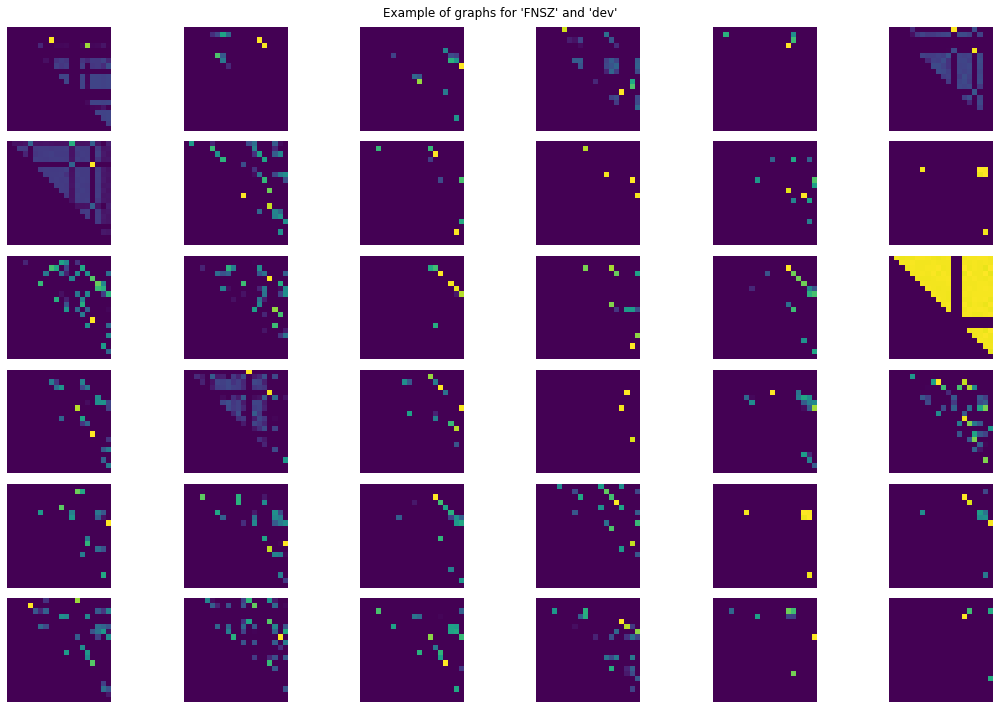

In [5]:
plot_graphs('dev','FNSZ',6,6,4)


Over-connected graphs :  0 (tot),  []


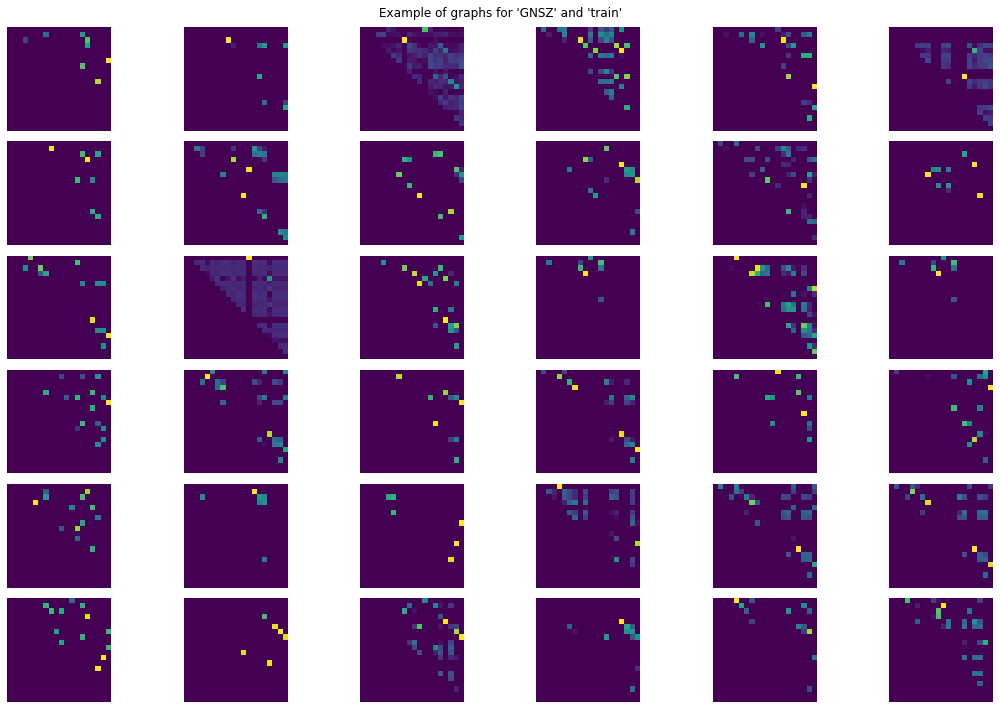

In [6]:
plot_graphs('train','GNSZ',6,6,0)